In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [28]:
# Load the image
image = plt.imread('images/jacob.jpeg')

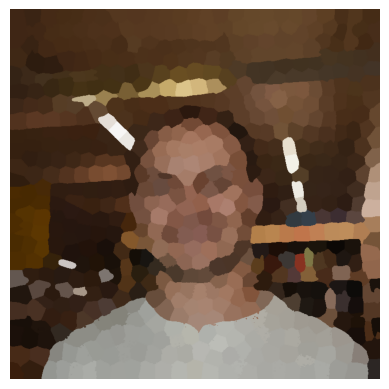

In [66]:
# Apply Gaussian blur with a 3x3 kernel
blurred_image = cv2.GaussianBlur(image, (3, 3), 0)

# Convert the image to LAB color space
lab_image = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2Lab)

# Create a superpixel segmenter
slic = cv2.ximgproc.createSuperpixelSLIC(
    lab_image, algorithm=cv2.ximgproc.SLICO, region_size=30, ruler=5.0
)

# Perform the superpixel segmentation
slic.iterate(15)

# Get the labels of the superpixels
labels = slic.getLabels()

# Create an output image to store the interpolated result
superpixel_image = image.copy()

# Iterate through each unique label
for label in np.unique(labels):
    # Create a mask for the current label
    mask = (labels == label)
    
    # Calculate the average color of the superpixel
    average_color = np.mean(image[mask], axis=0)
    
    # Assign the average color to the output image
    superpixel_image[mask] = average_color

# Display the result
plt.imshow(superpixel_image)
plt.axis('off')
plt.show()

plt.imsave('images/jacob_superpixel.jpg', superpixel_image)

In [72]:
tuple(average_color)


(44.820412168792934, 38.77036310107949, 36.42100098135427)

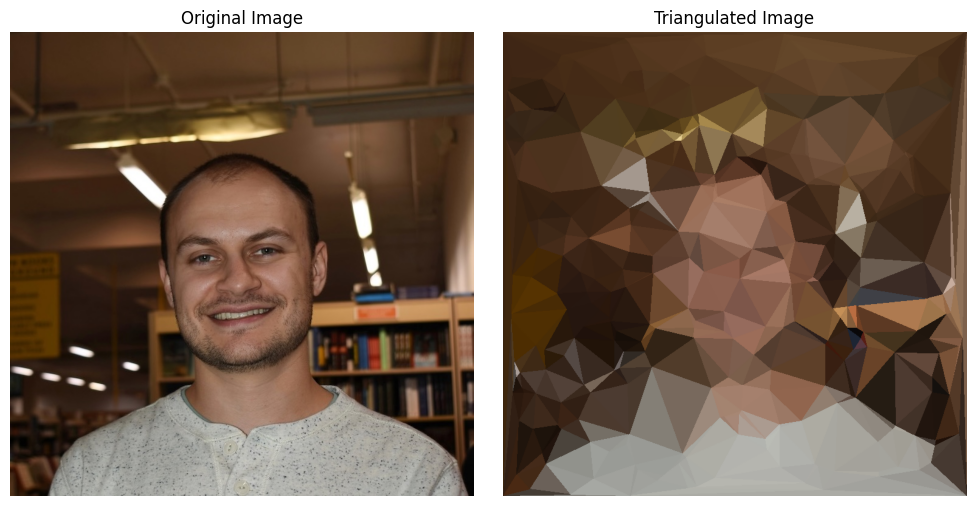

In [78]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay


def triangulate_image(image_path, num_points=500, output_path="triangulated_image.jpg"):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError("Image not found at the specified path.")

    # Convert to RGB for visualization
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    height, width, _ = image.shape

    # Generate random points across the image
    points = np.vstack(
        [
            np.random.randint(0, width, num_points),
            np.random.randint(0, height, num_points),
        ]
    ).T

    # Add image corners to ensure the entire image is triangulated
    corners = np.array(
        [[0, 0], [0, height - 1], [width - 1, 0], [width - 1, height - 1]]
    )
    points = np.vstack([points, corners])

    # Perform Delaunay triangulation
    delaunay = Delaunay(points)
    triangles = delaunay.simplices

    # Create an output image
    output_image = np.zeros_like(image)

    # Loop through each triangle
    for triangle in triangles:
        # Get the vertices of the triangle
        pts = points[triangle].astype(np.int32)

        # Create a mask for the triangle
        mask = np.zeros((height, width), dtype=np.uint8)
        cv2.fillPoly(mask, [pts], 1)

        # Find the average color within the triangle
        triangle_area = np.where(mask == 1)
        average_color = image[triangle_area].mean(axis=0).astype(np.uint8)
        

        # Fill the triangle in the output image
        cv2.fillPoly(output_image, [pts], color=tuple(map(int, average_color)))

    # Save the output
    cv2.imwrite(output_path, cv2.cvtColor(output_image, cv2.COLOR_RGB2BGR))

    # Display the original and processed images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Triangulated Image")
    plt.imshow(output_image)
    plt.axis("off")

    plt.tight_layout()
    plt.show()


# Example usage
triangulate_image("images/jacob.jpeg", num_points=300, output_path="images/jacob_triangulated.jpg")


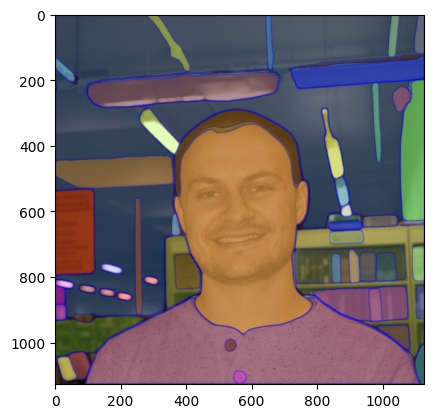

In [78]:
sam = plt.imread('images/jacob_sam.png')
sam = sam[:, :, :3]
plt.imshow(sam)

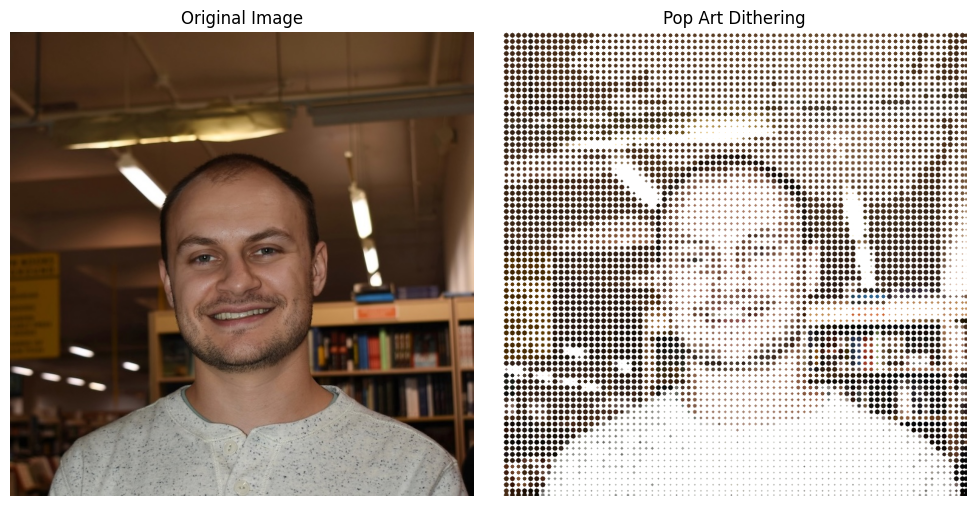

In [109]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def pop_art_dithering(image_path, dot_size=10, output_path="pop_art_image.jpg"):
    """Create a pop art style dithering effect with big dots."""
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError("Image not found at the specified path.")

    # Convert to grayscale for intensity-based dot sizing
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    h, w = gray_image.shape

    # Create a blank canvas for the output
    canvas = np.ones((h, w, 3), dtype=np.uint8) * 255  # White background

    # Iterate over the image in blocks of size `dot_size x dot_size`
    for y in range(0, h, dot_size):
        for x in range(0, w, dot_size):
            # Get the region's valid height and width
            block_height = min(dot_size, h - y)  # Ensure block fits within the image
            block_width = min(dot_size, w - x)

            # Get the average intensity of the current block
            block = gray_image[y : y + block_height, x : x + block_width]
            avg_intensity = block.mean()

            # Normalize intensity to determine dot radius (larger dots for darker areas)
            radius = int((1 - avg_intensity / 255) * (dot_size // 2))

            # Compute the center of the dot
            center = (x + block_width // 2, y + block_height // 2)

            # Draw the circle on the canvas
            color = tuple(
                image[y + block_height // 2, x + block_width // 2].tolist()
            )  # Use the original color
            cv2.circle(canvas, center, radius, color, -1)  # Filled circle

    # Save the result
    cv2.imwrite(output_path, cv2.cvtColor(canvas, cv2.COLOR_RGB2BGR))

    # Display the original and processed images
    original_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    canvas = cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(original_image)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Pop Art Dithering")
    plt.imshow(canvas)
    plt.axis("off")

    plt.tight_layout()
    plt.show()


# Example usage
pop_art_dithering("images/jacob.jpeg", dot_size=10, output_path="images/jacob_dithered.jpg")
